In [86]:
# Importing Libraries
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.integrate import solve_ivp
import scipy.optimize as opt
import math
import statistics as st
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
Galactose = [0,1]
Nitrogen = [0,1]
Interaction = [0, 0, 0, 1]
# create combinations for all parameters
experiments = [(x,y) for y in Galactose for x in Nitrogen]
exp_df = pd.DataFrame(experiments,columns=['A','B'])
exp_df['AB'] = Interaction
exp_df['Outcome_1'] = np.array([4.279530490964009e-11, 6.713798287378274e-11, 3.1670962303684503e-11, 5.13753659642438e-11])
exp_df['Outcome_2'] = np.array([4.134613574807558e-11, 6.439304197935628e-11, 3.8620908913289965e-11, 5.8167325249817565e-11])
exp_df['Avg_outcome'] = (exp_df['Outcome_1']+exp_df['Outcome_2'])/2
experiments

[(0, 0), (1, 0), (0, 1), (1, 1)]

In [31]:
results = smf.ols('Avg_outcome~ A + B + AB', data=exp_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Avg_outcome   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                nan
Time:                        17:41:29   Log-Likelihood:                 232.22
No. Observations:                   4   AIC:                            -456.4
Df Residuals:                       0   BIC:                            -458.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.207e-11        inf          0        n

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [65]:
def yeild(A,B):
  number = 4.207e-11 + 2.369e-11*A -6.925e-12*B -4.069e-12*A*B
  return number




In [33]:
equation = [yeild(0,0), yeild(1,0), yeild(0,1), yeild(1,1)]
equation

[4.207e-11, 6.576e-11, 3.5145000000000005e-11, 5.4766e-11]

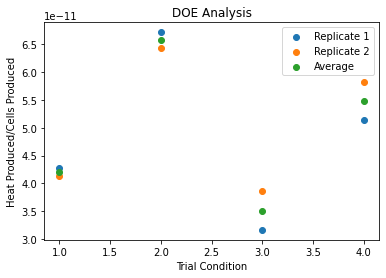

In [35]:
trial_condition = [1,2,3,4]
rep_1  = [4.279530490964009e-11, 6.713798287378274e-11, 3.1670962303684503e-11, 5.13753659642438e-11]
rep_2  = [4.134613574807558e-11, 6.439304197935628e-11, 3.8620908913289965e-11, 5.8167325249817565e-11]
DOE = [4.207e-11, 6.576e-11, 3.5145000000000005e-11, 5.4766e-11]

plt.scatter(trial_condition, rep_1)
plt.scatter(trial_condition, rep_2)
plt.scatter(trial_condition, DOE)



plt.title('DOE Analysis')
plt.xlabel('Trial Condition')
plt.ylabel('Heat Produced/Cells Produced')
plt.legend(['Replicate 1', 'Replicate 2', "Average"])

In [57]:
# Now lets plot the equation on a 3D space 
x = np.linspace(0, 1, 30)
y = np.linspace(0, 1, 30)

X, Y = np.meshgrid(x, y)
Z = yeild(X, Y)



x_actual = np.linspace(20, 30, 30)
y_actual = np.linspace(30, 45, 30)
X_actual, Y_actual = np.meshgrid(x_actual, y_actual)

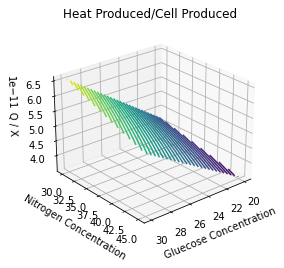

In [84]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X_actual, Y_actual, Z, 50)
ax.set_title('Heat Produced/Cell Produced')
ax.set_xlabel('Gluecose Concentration')
ax.set_ylabel('Nitrogen Concentration')
ax.set_zlabel('Q / X')
ax.view_init(25, 50)